In [1]:
import cv2
import matplotlib.pyplot as plt

In [3]:
from utils import *
from darknet import Darknet

#OB Detect

In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [6]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [7]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [8]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ##255/2=127.5
model.setInputMean((127.5,127.5,127.5)) #mobilenet=>[-1,1]
model.setInputSwapRB(True)

<dnn_Model 000002705B67E0D0>

#Helmet Detect

In [10]:
cfg_file = 'model/yolov3-obj.cfg'
weight_file = 'model/yolov3-obj_2400.weights'
namesfile = 'model/obj.names'

m = Darknet(cfg_file)
m.load_weights(weight_file)
class_names = load_class_names(namesfile)

In [15]:
img = cv2.imread('india_Motorcycle_20130322_0001.jpg')
img1 = img

In [16]:
print(m)

Darknet(
  (models): ModuleList(
    (0): Sequential(
      (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky1): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (1): Sequential(
      (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky2): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (2): Sequential(
      (conv3): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky3): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (3): Sequential(
      (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.

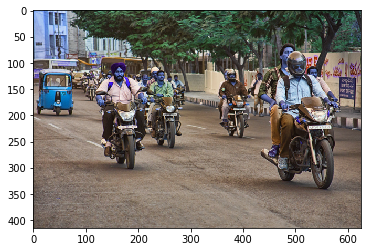

In [17]:
plt.imshow(img1)

#Ob detect

person
motorbike
person
motorbike
motorbike
person
person
motorbike
motorbike
car
1
person
motorbike
person
truck
person
person
person
motorbike


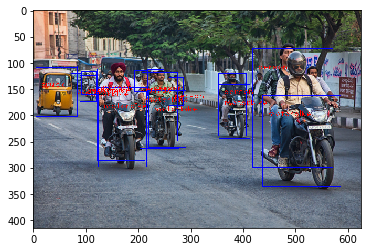

In [18]:
ClassIndex, confidece, bbox = model.detect(img1,confThreshold=0.5)
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN
i=1
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img1,boxes,(255, 0, 0),1)
    plt.imshow(img1)
    cv2.putText(img1,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,0,255), thickness=1)
    print(classLabels[ClassInd-1])
    #print(i+1,boxes)
    if classLabels[ClassInd-1]=="car":
        print(i)
        i=i+1
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))   



It took 2.232 seconds to detect the objects in the image.

Number of Objects Detected: 2 

Objects Found and Confidence Level:

1. Helmet: 1.000000
2. Helmet: 1.000000


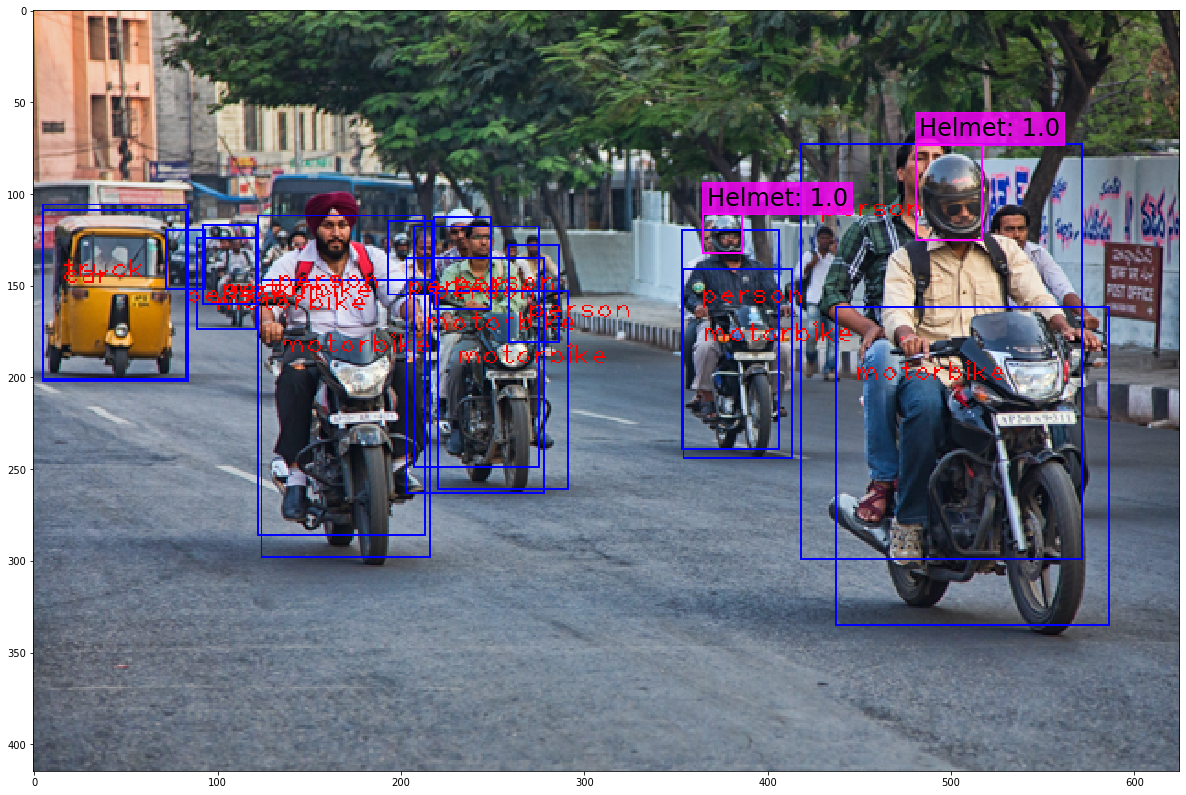

In [19]:
plt.rcParams['figure.figsize'] = [24.0, 14.0]

#img = cv2.imread('/content/drive/MyDrive/HELMET/helmet-detection/images/helmet3.jpg') for colab

#img = cv2.imread('Object Detection/india_Motorcycle_20130322_0001.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
resized_image = cv2.resize(original_image, (m.width, m.height))

iou_thresh = 0.4
nms_thresh = 0.6
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)

In [20]:
#production ID_5195178
#India - 8698
cap = cv2.VideoCapture("production ID_4740223.mp4")
#cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("hi")
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    
    #print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,0,255), thickness=1)
    cv2.imshow('OB detect',frame)
    print(classLabels[ClassInd-1])
    #if classLabels[ClassInd-1]=="car":
        #print(i)
        #i=i+1
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

motorbike
motorbike
person
person
person
motorbike
motorbike
motorbike
person
motorbike
motorbike
person
person
motorbike
person
person
motorbike
motorbike
person
person
motorbike
motorbike
person
person
motorbike
motorbike
person
motorbike
person
motorbike
motorbike
motorbike
person
person
person
motorbike
motorbike
motorbike
person
person
person
person
motorbike
person
person
motorbike
motorbike
person
person
person
motorbike
person
person
person
person
motorbike
person
person
motorbike
motorbike
motorbike
motorbike
person
person
motorbike
motorbike
motorbike




It took 1.023 seconds to detect the objects in the image.

Number of Objects Detected: 3 



It took 1.193 seconds to detect the objects in the image.

Number of Objects Detected: 3 

yes


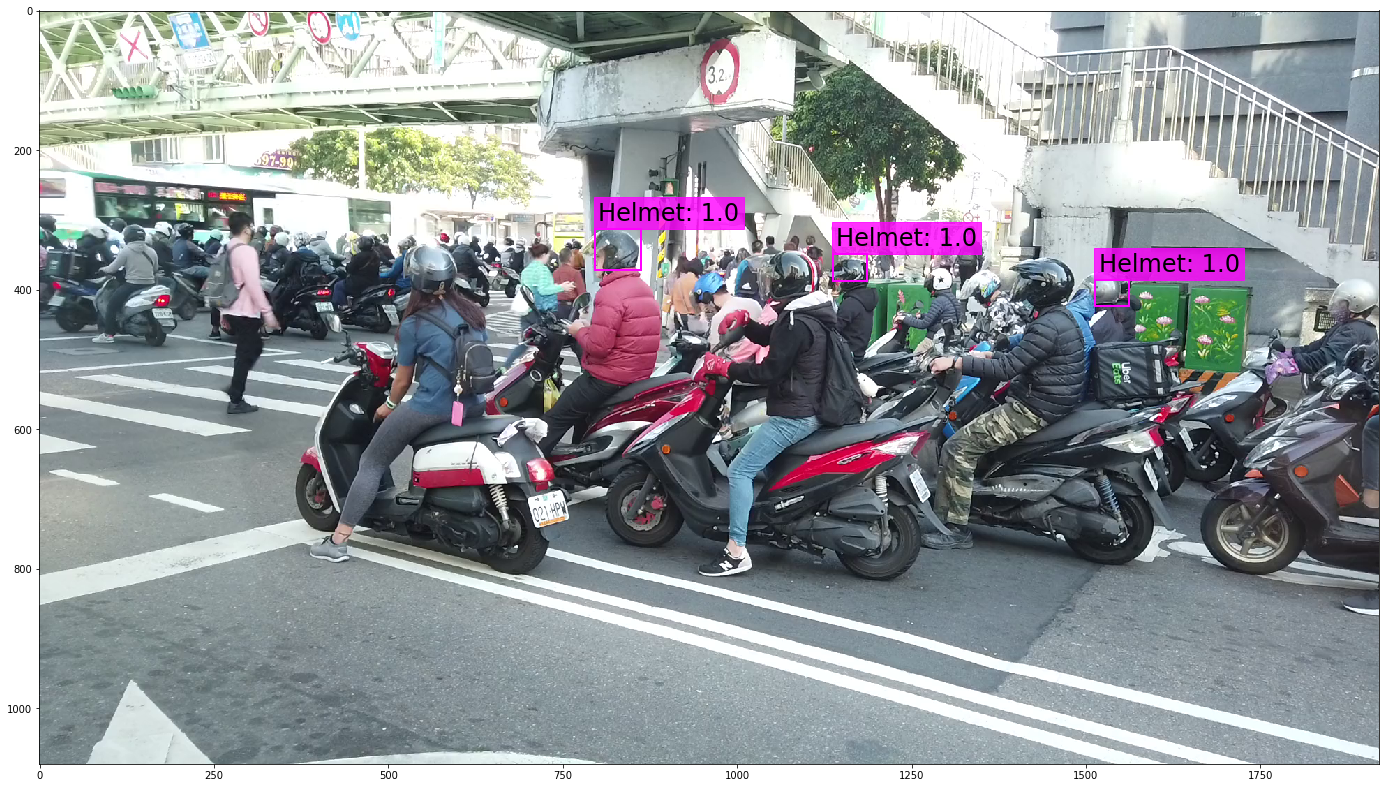



It took 1.377 seconds to detect the objects in the image.

Number of Objects Detected: 2 



In [ ]:
plt.rcParams['figure.figsize'] = [24.0, 14.0]
#production ID_4740223
#production ID_5195178
#production ID_5052598
#India - 8698
cap = cv2.VideoCapture("production ID_4740223.mp4")
#cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("hi")
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Video")

while True:
    ret,frame = cap.read()
    original_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(original_image, (m.width, m.height))
    iou_thresh = 0.4
    nms_thresh = 0.6
    boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
    #print_objects(boxes, class_names)
    if detect_objects(m, resized_image, iou_thresh, nms_thresh):
        print("yes")
        plot_boxes(original_image, boxes, class_names, plot_labels = True)
    cv2.imshow('OB detect',frame)
    
    #if classLabels[ClassInd-1]=="car":
        #print(i)
        #i=i+1
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
#print_objects(boxes, class_names)
